Dataset for Regression

In [10]:
import tensorflow as tf

N, n_feature = 8, 5

t_weights = tf.constant([1,2,3,4,5], dtype = tf.float32)
t_bias = tf.constant([10], dtype = tf.float32)


X= tf.random.normal(mean=0,stddev=1, shape=(N,n_feature))

print(X.shape, t_weights.shape, t_bias.shape)

y = t_weights*X + t_bias # 브로드캐스팅으로 곱하기
print(X, X.shape,"\n") 
print(y, y.shape,"\n")

Y = tf.reduce_sum(t_weights*X, axis=1) + t_bias
print(Y, Y.shape )

(8, 5) (5,) (1,)
tf.Tensor(
[[-0.1897946  -0.44287536 -0.1900942  -1.4986309   0.91528285]
 [-1.4807129  -0.67574215 -0.25615218 -0.23937777 -0.1580744 ]
 [ 0.38370416 -1.2536215   0.6892194   0.7279857   0.06453407]
 [-0.23303993 -2.2414753   0.4005565   1.212214   -2.838937  ]
 [ 0.575572   -0.33829165 -0.7143018  -0.699431    0.94203407]
 [-0.82686776  0.45421314  0.2893796   0.842434    1.0399338 ]
 [ 1.1636007   1.1196285   0.8598308   0.32379955 -0.34910887]
 [-1.2226766  -0.9467371   1.5538166  -0.9031842   0.84802055]], shape=(8, 5), dtype=float32) (8, 5) 

tf.Tensor(
[[ 9.810205   9.114249   9.429717   4.0054765 14.576414 ]
 [ 8.519287   8.648516   9.231544   9.042489   9.209628 ]
 [10.383704   7.492757  12.067658  12.9119425 10.32267  ]
 [ 9.76696    5.5170493 11.20167   14.848856  -4.194685 ]
 [10.575572   9.323417   7.857095   7.202276  14.710171 ]
 [ 9.173132  10.908426  10.868139  13.369736  15.199669 ]
 [11.163601  12.239257  12.579493  11.295198   8.254456 ]
 [ 8.777324

Dataset for Binary Classification

In [13]:
import tensorflow as tf

N, n_feature = 8, 5

t_weights = tf.constant([1,2,3,4,5], dtype = tf.float32)
t_bias = tf.constant([10], dtype = tf.float32)

X= tf.random.normal(mean=0,stddev=1, shape=(N,n_feature))
Y = tf.reduce_sum(t_weights*X, axis=1) + t_bias
Y = tf.cast(Y>5, tf.int32) # Binary Classification는 input인 데이터셋이 0 또는 1 로 나와야 하기 때문에
# 캐스팅을 통해서 0또는 1로 바꿔준다
# 여기서 Y>5 를 하면 불린 타입으로 나오고 그것을 tf.int32를 통해서 1 0 으로 바꾼것
# 여기서 Y>5 는 합격이냐 불합격이냐 이런 느낌의 조건이 된다.
print(Y)



tf.Tensor([1 1 0 0 1 1 1 1], shape=(8,), dtype=int32)


Dataset for Multi-class Classification

(30, 2) (30, 1)
(60, 2) (60, 1)
(90, 2) (90, 1)
X(shape/dtype/data): (90, 2) / <dtype: 'float32'>
[[  1.9238715    8.556612  ]
 [  1.8364543    8.010362  ]
 [  2.2846107    9.606791  ]
 [  2.435524     6.8731585 ]
 [  2.4154773    8.289635  ]
 [  0.48622358   9.82437   ]
 [  2.1226616    7.3098693 ]
 [  1.8850322    8.341318  ]
 [  1.0394965    6.889018  ]
 [  1.1696036    9.213081  ]
 [  1.4802134    9.318951  ]
 [  1.3827697    7.5122814 ]
 [  3.1758127   10.386001  ]
 [  0.8151752    8.448609  ]
 [  1.2949512    7.698453  ]
 [  2.4381528    8.591212  ]
 [  3.372452     8.666025  ]
 [  3.4762993    9.095864  ]
 [  3.3200278   10.270305  ]
 [  1.9138141    9.433446  ]
 [  4.1298866   10.287558  ]
 [  2.0760074    6.134142  ]
 [  2.1954565    6.9826264 ]
 [  0.9868375    8.928118  ]
 [  0.31233668   8.340517  ]
 [  2.6722164    9.740034  ]
 [  2.3967018    9.028214  ]
 [  2.7559166    8.548593  ]
 [  3.1049433    9.046218  ]
 [  1.9816694    8.6057005 ]
 [  9.939273     5.918193  ]
 [ 

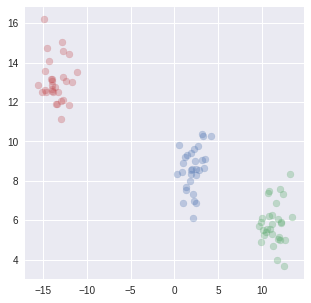

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('seaborn')

N,n_feature = 30,2
n_class = 3

X = tf.zeros(shape = (0,n_feature))
Y = tf.zeros(shape=(0,1),dtype = tf.int32)

fig, ax = plt.subplots(figsize=(5,5))

for class_idx in range(n_class):
  center = tf.random.uniform(minval =-15, maxval=15, shape=(2,)) 
  # center[0] = x값, center[1] = y값
  # ax.scatter(center[0],center[1])

  x1 = center[0] + tf.random.normal(shape=(N,1)) # x값 주변에 30(N)개씩 점 추가해서 영역 생성
  x2 = center[1] + tf.random.normal(shape=(N,1)) # y값 주변에 30(N)개씩 점 추가해서 영역 생성

  #ax.scatter(x1.numpy(), x2.numpy())

  x = tf.concat((x1,x2),axis=1)
  y = class_idx*tf.ones(shape=(N,1), dtype=tf.int32)

  #print(x.shape, y.shape)

  ax.scatter(x[:,0].numpy(), x[:,1].numpy(), alpha =0.3) # 결과적으로 각 영역이 하나의 데이터 셋이 된다.

  X = tf.concat((X,x), axis = 0)
  Y = tf.concat((Y,y), axis = 0)

  print(X.shape, Y.shape)

print("X(shape/dtype/data): {} / {}\n{}\n".format(X.shape, X.dtype, X.numpy()))
print("Y(shape/dtype/data): {} / {}\n{}\n".format(Y.shape, Y.dtype, Y.numpy())) 

Dataset for Multi-class Classification with One-hot Encoding

(24, 2) (24, 1)
X(shape/dtype/data): (24, 2) / <dtype: 'float32'>
[[-12.435678   -13.464127  ]
 [-13.286019   -13.50438   ]
 [-15.622095   -13.570034  ]
 [-15.103091   -11.138169  ]
 [-14.685705   -12.625588  ]
 [-14.25891    -13.387359  ]
 [-15.240373   -14.404649  ]
 [-13.91861    -11.08847   ]
 [ 12.495551     8.612012  ]
 [ 13.131439     8.462014  ]
 [ 10.767958     7.850316  ]
 [ 12.495249     7.891487  ]
 [ 11.363252     8.665275  ]
 [ 11.845879    10.690586  ]
 [ 12.550166     5.099517  ]
 [ 12.745957     9.274074  ]
 [ -1.9050211    5.9504404 ]
 [ -2.2435133    2.278779  ]
 [ -3.3406994    3.3424153 ]
 [ -2.1668026    3.961874  ]
 [ -2.673834     2.4162354 ]
 [ -2.5604422    3.1962056 ]
 [ -0.82433426   2.0631084 ]
 [ -2.2726238    4.48595   ]]

Y(shape/dtype/data): (24, 1, 3) / <dtype: 'int32'>
[[[1 0 0]]

 [[1 0 0]]

 [[1 0 0]]

 [[1 0 0]]

 [[1 0 0]]

 [[1 0 0]]

 [[1 0 0]]

 [[1 0 0]]

 [[0 1 0]]

 [[0 1 0]]

 [[0 1 0]]

 [[0 1 0]]

 [[0 1 0]]

 [[0 1 0]]

 [[0 1 0]]

 [[0 

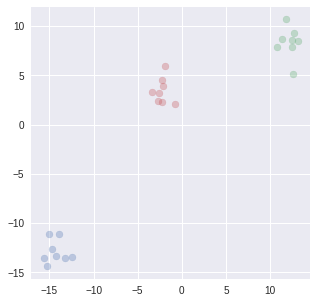

In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('seaborn')

N,n_feature = 8,2
n_class = 3

X = tf.zeros(shape = (0,n_feature))
Y = tf.zeros(shape=(0,1),dtype = tf.int32)

fig, ax = plt.subplots(figsize=(5,5))

for class_idx in range(n_class):
  center = tf.random.uniform(minval =-15, maxval=15, shape=(2,)) 
  # center[0] = x값, center[1] = y값
  # ax.scatter(center[0],center[1])

  x1 = center[0] + tf.random.normal(shape=(N,1)) # x값 주변에 30(N)개씩 점 추가해서 영역 생성
  x2 = center[1] + tf.random.normal(shape=(N,1)) # y값 주변에 30(N)개씩 점 추가해서 영역 생성

  #ax.scatter(x1.numpy(), x2.numpy())

  x = tf.concat((x1,x2),axis=1)
  y = class_idx*tf.ones(shape=(N,1), dtype=tf.int32)

  #print(x.shape, y.shape)

  ax.scatter(x[:,0].numpy(), x[:,1].numpy(), alpha =0.3) # 결과적으로 각 영역이 하나의 데이터 셋이 된다.

  X = tf.concat((X,x), axis = 0)
  Y = tf.concat((Y,y), axis = 0)

print(X.shape, Y.shape)

Y = tf.one_hot(Y, depth=n_class,dtype=tf.int32) # one_hot 인코딩 

print("X(shape/dtype/data): {} / {}\n{}\n".format(X.shape, X.dtype, X.numpy()))
print("Y(shape/dtype/data): {} / {}\n{}\n".format(Y.shape, Y.dtype, Y.numpy()))

Dataset Objects

In [28]:
import tensorflow as tf

N, n_feature = 100, 5
batch_size = 32

t_weights = tf.constant([1,2,3,4,5], dtype = tf.float32)
t_bias = tf.constant([10], dtype = tf.float32)

X= tf.random.normal(mean=0,stddev=1, shape=(N,n_feature))
Y = tf.reduce_sum(t_weights*X, axis=1) + t_bias

'''
for batch_idx in range(N//batch_size):
  x = X[batch_idx * batch_size : (batch_idx + 1)* batch_size, ...]
  y = Y[batch_idx * batch_size : (batch_idx + 1)* batch_size, ...]

  print(x.shape, y.shape)
'''

dataset = tf.data.Dataset.from_tensor_slices((X,Y)) # 데이터셋 object를 만듦
dataset = dataset.batch(batch_size)

for x,y in dataset:
  print(x.shape, y.shape)

(32, 5) (32,)
(32, 5) (32,)
(32, 5) (32,)
(4, 5) (4,)
